## E10-2
#### This Notebook is about using SPARK Dataframe functions to process nsedata.csv.

### <b>Problem</b>
- Write SPARK code to solve the problem stated at the end this Notebook (<b>do not use the createTempView function!</b>)

### <b>Submission</b>
Create and upload a PDF of this Notebook after completing your assignment. <b> BEFORE CONVERTING TO PDF and UPLOADING ENSURE THAT YOU REMOVE / TRIM LENGTHY DEBUG OUTPUTS </b>. Short debug outputs of up to 5 lines are acceptable.


In [3]:
import findspark
findspark.init()

In [4]:
import pyspark
from pyspark.sql.types import *

In [5]:
sc = pyspark.SparkContext(appName="E10-2")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/31 12:33:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
ss = pyspark.sql.SparkSession(sc)

In [7]:
dfr = ss.read

In [8]:
schemaStruct = StructType()
schemaStruct.add("SYMBOL", StringType(), True)
schemaStruct.add("SERIES", StringType(), True)
schemaStruct.add("OPEN", DoubleType(), True)
schemaStruct.add("HIGH", DoubleType(), True)
schemaStruct.add("LOW", DoubleType(), True)
schemaStruct.add("CLOSE", DoubleType(), True)
schemaStruct.add("LAST", DoubleType(), True)
schemaStruct.add("PREVCLOSE", DoubleType(), True)
schemaStruct.add("TOTTRDQTY", LongType(), True)
schemaStruct.add("TOTTRDVAL", DoubleType(), True)
schemaStruct.add("TIMESTAMP", StringType(), True)
schemaStruct.add("ADDNL", StringType(), True)


StructType([StructField('SYMBOL', StringType(), True), StructField('SERIES', StringType(), True), StructField('OPEN', DoubleType(), True), StructField('HIGH', DoubleType(), True), StructField('LOW', DoubleType(), True), StructField('CLOSE', DoubleType(), True), StructField('LAST', DoubleType(), True), StructField('PREVCLOSE', DoubleType(), True), StructField('TOTTRDQTY', LongType(), True), StructField('TOTTRDVAL', DoubleType(), True), StructField('TIMESTAMP', StringType(), True), StructField('ADDNL', StringType(), True)])

In [9]:
df = dfr.csv("/home/hduser/spark/nsedata.csv", schema=schemaStruct, header=True)

In [10]:
df.printSchema()

root
 |-- SYMBOL: string (nullable = true)
 |-- SERIES: string (nullable = true)
 |-- OPEN: double (nullable = true)
 |-- HIGH: double (nullable = true)
 |-- LOW: double (nullable = true)
 |-- CLOSE: double (nullable = true)
 |-- LAST: double (nullable = true)
 |-- PREVCLOSE: double (nullable = true)
 |-- TOTTRDQTY: long (nullable = true)
 |-- TOTTRDVAL: double (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- ADDNL: string (nullable = true)



In [11]:
from pyspark.sql.functions import col, date_format, to_date

df1 = df.withColumn("TIMESTAMP2", date_format(to_date(col("TIMESTAMP"), "dd-MMM-yyyy"), "yyyy-MM"))

In [42]:
df1.printSchema()
df1.show(3)

root
 |-- SYMBOL: string (nullable = true)
 |-- SERIES: string (nullable = true)
 |-- OPEN: double (nullable = true)
 |-- HIGH: double (nullable = true)
 |-- LOW: double (nullable = true)
 |-- CLOSE: double (nullable = true)
 |-- LAST: double (nullable = true)
 |-- PREVCLOSE: double (nullable = true)
 |-- TOTTRDQTY: long (nullable = true)
 |-- TOTTRDVAL: double (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- ADDNL: string (nullable = true)
 |-- TIMESTAMP2: string (nullable = true)

+----------+------+------+-------+------+------+------+---------+---------+-------------+-----------+-----+----------+
|    SYMBOL|SERIES|  OPEN|   HIGH|   LOW| CLOSE|  LAST|PREVCLOSE|TOTTRDQTY|    TOTTRDVAL|  TIMESTAMP|ADDNL|TIMESTAMP2|
+----------+------+------+-------+------+------+------+---------+---------+-------------+-----------+-----+----------+
| 20MICRONS|    EQ| 37.75|  37.75| 36.35| 37.45|  37.3|    37.15|    38638|    1420968.1|01-APR-2011|    0|   2011-04|
|3IINFOTECH|    EQ| 4

23/10/31 12:55:18 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 14, schema size: 12
CSV file: file:///home/hduser/spark/nsedata.csv


## Problem Statement
Using SPARK Dataframe functions write code to create the data shown below for all the traded companies. Save this data in an output file in <b>ascending order</b> of the company names, year and month.

<b>SYMBOL | Month-Year | min(CLOSE) | max(CLOSE) | avg(CLOSE) | stddev(CLOSE) | tradedCount |</b>

The output should appear as follows

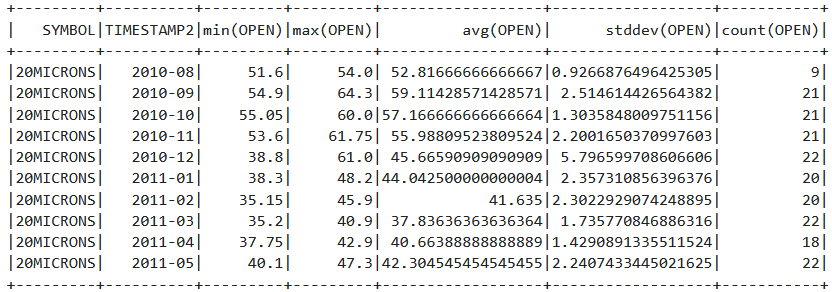

tradedCount = number of times the company shares have been traded in that month

#### Notes and Hints: 
- use the functions <b>groupBy</b> (based on SYMBOL and TIMESTAMP2) and <b>agg</b> to create the individual statistics like min, max, avg, etc.
- use <b>join</b> (based on SYMBOL and TIMESTAMP2) to combine the individual dataframes into a single table

This is just one method of solving the problem! You can discover of any other method, using any other combination of Dataframe functions- 

In [35]:
temp_df=df1
grouped_df = df1.groupBy("SYMBOL", "TIMESTAMP2")
result_df = grouped_df.agg({'CLOSE': 'min'})
result_df.show(3)

+----------+----------+----------+
|    SYMBOL|TIMESTAMP2|min(CLOSE)|
+----------+----------+----------+
|  AREVAT&D|   2011-04|    251.15|
| CHEMPLAST|   2011-04|       6.4|
|FIRSTLEASE|   2011-04|     73.45|
+----------+----------+----------+
only showing top 3 rows



In [14]:
temp_sorted=result_df.orderBy("SYMBOL","TIMESTAMP2")

In [36]:
temp_sorted.show(3)
# print(temp_sorted)

+---------+----------+----------+
|   SYMBOL|TIMESTAMP2|min(CLOSE)|
+---------+----------+----------+
|20MICRONS|   2010-08|     51.55|
|20MICRONS|   2010-09|      54.9|
|20MICRONS|   2010-10|     54.35|
+---------+----------+----------+
only showing top 3 rows



In [29]:
max_df = grouped_df.agg({'CLOSE': 'max'})
avg_df= grouped_df.agg({'CLOSE': 'avg'})
std_dev_df=grouped_df.agg({'CLOSE':'stddev'})
count_df = grouped_df.agg({'CLOSE': 'count'})

In [37]:
max_sorted=max_df.orderBy("SYMBOL","TIMESTAMP2")
max_sorted.show(3)

+---------+----------+----------+
|   SYMBOL|TIMESTAMP2|max(CLOSE)|
+---------+----------+----------+
|20MICRONS|   2010-08|      54.3|
|20MICRONS|   2010-09|      60.9|
|20MICRONS|   2010-10|     58.55|
+---------+----------+----------+
only showing top 3 rows



In [41]:
avg_sorted.show(3)
avg_sorted=avg_df.orderBy("SYMBOL","TIMESTAMP2")


+---------+----------+-----------------+
|   SYMBOL|TIMESTAMP2|       avg(CLOSE)|
+---------+----------+-----------------+
|20MICRONS|   2010-08|            52.75|
|20MICRONS|   2010-09| 58.4547619047619|
|20MICRONS|   2010-10|56.37857142857143|
+---------+----------+-----------------+
only showing top 3 rows



In [38]:
std_sorted_df.show(3)
std_sorted_df=std_dev_df.orderBy("SYMBOL","TIMESTAMP2")

+---------+----------+------------------+
|   SYMBOL|TIMESTAMP2|     stddev(CLOSE)|
+---------+----------+------------------+
|20MICRONS|   2010-08|1.0647769719523452|
|20MICRONS|   2010-09|1.7269123285436907|
|20MICRONS|   2010-10|0.8949261741299467|
+---------+----------+------------------+
only showing top 3 rows



In [40]:
count_sorted=count_df.orderBy("SYMBOL","TIMESTAMP2")
count_sorted.show(3)

+---------+----------+------------+
|   SYMBOL|TIMESTAMP2|count(CLOSE)|
+---------+----------+------------+
|20MICRONS|   2010-08|           9|
|20MICRONS|   2010-09|          21|
|20MICRONS|   2010-10|          21|
+---------+----------+------------+
only showing top 3 rows



In [39]:
join_1=temp_sorted.join(max_sorted,on=['SYMBOL','TIMESTAMP2'],how='inner')
join_1.show(3)

+----------+----------+----------+----------+
|    SYMBOL|TIMESTAMP2|min(CLOSE)|max(CLOSE)|
+----------+----------+----------+----------+
|  AREVAT&D|   2011-04|    251.15|     291.2|
| CHEMPLAST|   2011-04|       6.4|       8.2|
|FIRSTLEASE|   2011-04|     73.45|     105.2|
+----------+----------+----------+----------+
only showing top 3 rows



In [31]:
join_2=join_1.join(avg_sorted,on=['SYMBOL','TIMESTAMP2'],how='inner')
join_3=join_2.join(std_sorted_df,on=['SYMBOL','TIMESTAMP2'],how='inner')
final=join_3.join(count_sorted,on=['SYMBOL','TIMESTAMP2'],how='inner')

In [34]:
final.show(5)

+---------+----------+----------+----------+------------------+------------------+------------+
|   SYMBOL|TIMESTAMP2|min(CLOSE)|max(CLOSE)|        avg(CLOSE)|     stddev(CLOSE)|count(CLOSE)|
+---------+----------+----------+----------+------------------+------------------+------------+
|20MICRONS|   2010-08|     51.55|      54.3|             52.75|1.0647769719523452|           9|
|20MICRONS|   2010-09|      54.9|      60.9|  58.4547619047619|1.7269123285436907|          21|
|20MICRONS|   2010-11|     53.35|      60.3| 55.69047619047619|1.8280193549043067|          21|
|20MICRONS|   2011-01|      41.3|     47.75|43.917500000000004|1.9892656010646148|          20|
|20MICRONS|   2011-03|     35.85|      40.1| 37.70227272727272|1.3524648813966484|          22|
+---------+----------+----------+----------+------------------+------------------+------------+
only showing top 5 rows



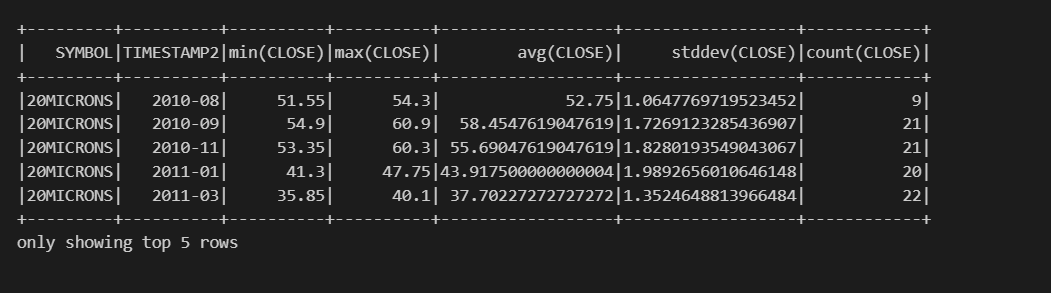

In [ ]:
ss.stop()
sc.stop()

#PS:During the conversion into pdf the last table was a bit unorganized as it was comparatively having more breadth.
#Thus I made its image in a markdown cell